In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas.tools import sjoin
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm
import matplotlib.colors as colors
import geoplot as gplt
import matplotlib.animation as animation
import shapely

In [14]:
All=pd.read_excel("State Covid race age-adjusted rates.xlsx")
Columns=np.array(All.iloc[0])
All=All.drop(All.index[0])
All.columns=Columns


In [15]:
State_shape = gpd.read_file('us-states.geojson')
State_shape['State']=State_shape['wikipedia'].str.split('/',expand=True)[4].str.split('(',expand=True)[0].str.replace('_',' ').str.strip()
NewYork_shape=State_shape[State_shape['State']=='New York']
State_shape=State_shape[State_shape['State']!='New York']
NewYork_shape['State']='New York State (Excluding NYC)'

In [17]:
NYC_shape = gpd.read_file('Borough Boundaries.geojson')
NYC_shape['bin']=1
NYC_shape_diss=NYC_shape.dissolve(by='bin')
#NYC_shape_diss.to_file("NYC_diss.geojson", driver='GeoJSON')

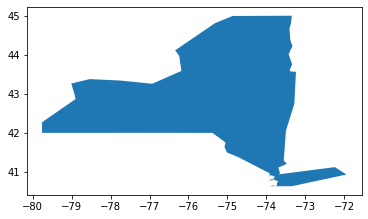

In [18]:
Diff=gpd.geopandas.overlay(NewYork_shape,NYC_shape_diss, how='difference')
Diff.plot()
NYC_shape_diss['State']='New York City'
NYC_shape_diss=NYC_shape_diss[['geometry', 'State']]

In [19]:
Temp=pd.concat([State_shape, Diff, NYC_shape_diss])
Temp

,scalerank,featurecla,adm1_code,diss_me,adm1_cod_1,iso_3166_2,wikipedia,sr_sov_a3,sr_adm0_a3,iso_a2,...,area_sqkm,sameascity,labelrank,featurec_1,admin,name_len,mapcolor9,mapcolor13,geometry,State
0,2.0,Admin-1 scale rank,USA-3557,3557.0,USA-3557,US-MD,http://en.wikipedia.org/wiki/Maryland,US1,USA,US,...,0.0,-99.0,0.0,Admin-1 scale rank,United States of America,8.0,1.0,1.0,"POLYGON ((-77.52330 39.72566, -76.66818 39.720...",Maryland
1,2.0,Admin-1 scale rank,USA-3514,3514.0,USA-3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US1,USA,US,...,0.0,-99.0,0.0,Admin-1 scale rank,United States of America,9.0,1.0,1.0,"POLYGON ((-92.01192 46.71172, -92.27488 46.656...",Minnesota
2,2.0,Admin-1 scale rank,USA-3515,3515.0,USA-3515,US-MT,http://en.wikipedia.org/wiki/Montana,US1,USA,US,...,0.0,-99.0,0.0,Admin-1 scale rank,United States of America,7.0,1.0,1.0,"POLYGON ((-104.02662 45.95660, -104.07796 45.0...",Montana
3,2.0,Admin-1 scale rank,USA-3516,3516.0,USA-3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US1,USA,US,...,0.0,-99.0,0.0,Admin-1 scale rank,United States of America,12.0,1.0,1.0,"POLYGON ((-97.22894 49.00089, -97.21414 48.902...",North Dakota
4,2.0,Admin-1 scale rank,USA-3517,3517.0,USA-3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US1,USA,US,...,0.0,-99.0,0.0,Admin-1 scale rank,United States of America,6.0,1.0,1.0,"MULTIPOLYGON (((-155.54211 19.08348, -155.6881...",Hawaii
5,2.0,Admin-1 scale rank,USA-3518,3518.0,USA-3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US1,USA,US,...,0.0,-99.0,0.0,Admin-1 scale rank,United States of America,5.0,1.0,1.0,"POLYGON ((-111.08518 44.50614, -111.04973 44.4...",Idaho
6,2.0,Admin-1 scale rank,USA-3519,3519.0,USA-3519,US-WA,http://en.wikipedia.org/wiki/Washington_(state),US1,USA,US,...,0.0,-99.0,0.0,Admin-1 scale rank,United States of America,10.0,1.0,1.0,"POLYGON ((-117.03143 48.99931, -117.02665 47.7...",Washington
7,2.0,Admin-1 scale rank,USA-3520,3520.0,USA-3520,US-AZ,http://en.wikipedia.org/wiki/Arizona,US1,USA,US,...,0.0,-99.0,0.0,Admin-1 scale rank,United States of America,7.0,1.0,1.0,"POLYGON ((-109.04523 36.99992, -109.04367 31.3...",Arizona
8,2.0,Admin-1 scale rank,USA-3521,3521.0,USA-3521,US-CA,http://en.wikipedia.org/wiki/California,US1,USA,US,...,0.0,-99.0,0.0,Admin-1 scale rank,United States of America,10.0,1.0,1.0,"POLYGON ((-119.99897 41.99261, -120.00003 38.9...",California
9,2.0,Admin-1 scale rank,USA-3522,3522.0,USA-3522,US-CO,http://en.wikipedia.org/wiki/Colorado,US1,USA,US,...,0.0,-99.0,0.0,Admin-1 scale rank,United States of America,8.0,1.0,1.0,"POLYGON ((-102.04709 40.00081, -102.03858 38.4...",Colorado


,OBJECTID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,POPULATION,POP_SQMI,POP2010,POP10_SQMI,WHITE,...,RENTER_OCC,NO_FARMS17,AVE_SIZE17,CROP_ACR17,AVE_SALE17,SQMI,Shape_Leng,Shape_Area,geometry,State
0,1.0,Alabama,01,East South Central,AL,4968383.0,96.2,4779736.0,92.5,3275394.0,...,571202.0,40592.0,211.0,2818783.0,147334.0,51649.05,22.594773,12.880058,"MULTIPOLYGON (((-88.07830 30.25214, -88.07833 ...",Alabama
1,2.0,Alaska,02,Pacific,AK,750876.0,1.3,710231.0,1.2,473576.0,...,95293.0,990.0,858.0,83732.0,71171.0,581369.17,846.314285,279.509014,"MULTIPOLYGON (((-179.10754 51.30120, -179.1093...",Alaska
2,3.0,Arizona,04,Mountain,AZ,7132147.0,62.6,6392017.0,56.1,4667121.0,...,809303.0,19086.0,1369.0,1286648.0,201824.0,113997.77,23.901193,28.921312,"POLYGON ((-109.04522 36.99909, -109.05376 36.9...",Arizona
3,4.0,Arkansas,05,West South Central,AR,3067536.0,57.7,2915918.0,54.8,2245229.0,...,378928.0,42625.0,326.0,7825947.0,226420.0,53178.77,22.049350,13.585568,"POLYGON ((-89.73310 36.00061, -89.73354 36.000...",Arkansas
4,5.0,California,06,Pacific,CA,39806791.0,251.7,37253956.0,235.6,21453934.0,...,5542127.0,70521.0,348.0,9597439.0,640297.0,158144.83,57.604549,41.639274,"MULTIPOLYGON (((-117.21222 32.77345, -117.2120...",California
5,6.0,Colorado,08,Mountain,CO,5711572.0,54.9,5029196.0,48.3,4089202.0,...,679768.0,38893.0,818.0,11056259.0,192623.0,104093.95,22.021460,28.039455,"POLYGON ((-104.05325 41.00141, -104.06672 41.0...",Colorado
6,7.0,Connecticut,09,New England,CT,3631470.0,731.7,3574097.0,720.2,2772410.0,...,445801.0,5521.0,69.0,148609.0,105074.0,4962.77,13.317932,1.388655,"MULTIPOLYGON (((-73.62286 40.98370, -73.62291 ...",Connecticut
7,8.0,Delaware,10,South Atlantic,DE,988421.0,500.3,897934.0,454.5,618617.0,...,95573.0,2302.0,228.0,452211.0,636826.0,1975.78,8.885625,0.532073,"MULTIPOLYGON (((-75.08248 38.45690, -75.08316 ...",Delaware
8,9.0,District of Columbia,11,South Atlantic,DC,688642.0,11073.2,601723.0,9675.6,231471.0,...,154652.0,0.0,0.0,0.0,0.0,62.19,0.964015,0.016727,"MULTIPOLYGON (((-77.02048 38.80596, -77.02064 ...",District of Columbia
9,10.0,Florida,12,South Atlantic,FL,20875686.0,368.2,18801310.0,331.6,14109162.0,...,2421823.0,47590.0,204.0,2825803.0,154599.0,56695.03,182.121599,13.557293,"MULTIPOLYGON (((-81.96356 24.52108, -81.96339 ...",Florida


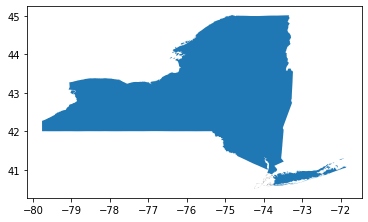

In [20]:
State_shape = gpd.read_file('US_states.geojson')
State_shape['State']=State_shape['STATE_NAME']
NewYork_shape=State_shape[State_shape['State']=='New York']
State_shape=State_shape[State_shape['State']!='New York']
NewYork_shape['State']='New York State (Excluding NYC)'
NYC_shape = gpd.read_file('Borough Boundaries.geojson')
NYC_shape['bin']=1
NYC_shape_diss=NYC_shape.dissolve(by='bin')
#NYC_shape_diss.to_file("NYC_diss.geojson", driver='GeoJSON')
Diff=gpd.geopandas.overlay(NewYork_shape,NYC_shape_diss, how='difference')
Diff.plot()
NYC_shape_diss['State']='New York City'
NYC_shape_diss=NYC_shape_diss[['geometry', 'State']]
Temp2=pd.concat([State_shape, Diff, NYC_shape_diss])
Temp2

In [22]:
Fin_geo=pd.merge(Temp,Temp2[['geometry', 'State']],
                 on='State', how='left')


,scalerank,featurecla,adm1_code,diss_me,adm1_cod_1,iso_3166_2,wikipedia,sr_sov_a3,sr_adm0_a3,iso_a2,...,sameascity,labelrank,featurec_1,admin,name_len,mapcolor9,mapcolor13,geometry_x,State,geometry_y
0,2.0,Admin-1 scale rank,USA-3557,3557.0,USA-3557,US-MD,http://en.wikipedia.org/wiki/Maryland,US1,USA,US,...,-99.0,0.0,Admin-1 scale rank,United States of America,8.0,1.0,1.0,"POLYGON ((-77.52330 39.72566, -76.66818 39.720...",Maryland,"MULTIPOLYGON (((-75.87841 37.91372, -75.87822 ..."
1,2.0,Admin-1 scale rank,USA-3514,3514.0,USA-3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US1,USA,US,...,-99.0,0.0,Admin-1 scale rank,United States of America,9.0,1.0,1.0,"POLYGON ((-92.01192 46.71172, -92.27488 46.656...",Minnesota,"MULTIPOLYGON (((-92.18976 46.68658, -92.18783 ..."
2,2.0,Admin-1 scale rank,USA-3515,3515.0,USA-3515,US-MT,http://en.wikipedia.org/wiki/Montana,US1,USA,US,...,-99.0,0.0,Admin-1 scale rank,United States of America,7.0,1.0,1.0,"POLYGON ((-104.02662 45.95660, -104.07796 45.0...",Montana,"POLYGON ((-104.04874 48.99988, -104.07806 49.0..."
3,2.0,Admin-1 scale rank,USA-3516,3516.0,USA-3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US1,USA,US,...,-99.0,0.0,Admin-1 scale rank,United States of America,12.0,1.0,1.0,"POLYGON ((-97.22894 49.00089, -97.21414 48.902...",North Dakota,"POLYGON ((-97.22904 49.00069, -97.23804 49.000..."
4,2.0,Admin-1 scale rank,USA-3517,3517.0,USA-3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US1,USA,US,...,-99.0,0.0,Admin-1 scale rank,United States of America,6.0,1.0,1.0,"MULTIPOLYGON (((-155.54211 19.08348, -155.6881...",Hawaii,"MULTIPOLYGON (((-155.90856 19.18114, -155.9087..."
5,2.0,Admin-1 scale rank,USA-3518,3518.0,USA-3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US1,USA,US,...,-99.0,0.0,Admin-1 scale rank,United States of America,5.0,1.0,1.0,"POLYGON ((-111.08518 44.50614, -111.04973 44.4...",Idaho,"POLYGON ((-116.04919 49.00091, -116.06051 49.0..."
6,2.0,Admin-1 scale rank,USA-3519,3519.0,USA-3519,US-WA,http://en.wikipedia.org/wiki/Washington_(state),US1,USA,US,...,-99.0,0.0,Admin-1 scale rank,United States of America,10.0,1.0,1.0,"POLYGON ((-117.03143 48.99931, -117.02665 47.7...",Washington,"MULTIPOLYGON (((-124.00198 46.37652, -124.0021..."
7,2.0,Admin-1 scale rank,USA-3520,3520.0,USA-3520,US-AZ,http://en.wikipedia.org/wiki/Arizona,US1,USA,US,...,-99.0,0.0,Admin-1 scale rank,United States of America,7.0,1.0,1.0,"POLYGON ((-109.04523 36.99992, -109.04367 31.3...",Arizona,"POLYGON ((-109.04522 36.99909, -109.05376 36.9..."
8,2.0,Admin-1 scale rank,USA-3521,3521.0,USA-3521,US-CA,http://en.wikipedia.org/wiki/California,US1,USA,US,...,-99.0,0.0,Admin-1 scale rank,United States of America,10.0,1.0,1.0,"POLYGON ((-119.99897 41.99261, -120.00003 38.9...",California,"MULTIPOLYGON (((-117.21222 32.77345, -117.2120..."
9,2.0,Admin-1 scale rank,USA-3522,3522.0,USA-3522,US-CO,http://en.wikipedia.org/wiki/Colorado,US1,USA,US,...,-99.0,0.0,Admin-1 scale rank,United States of America,8.0,1.0,1.0,"POLYGON ((-102.04709 40.00081, -102.03858 38.4...",Colorado,"POLYGON ((-104.05325 41.00141, -104.06672 41.0..."


In [28]:
Fin_geo=Fin_geo.drop(columns='geometry_x').rename(columns={"geometry_y": "geometry"})

In [29]:
Fin=pd.merge(Fin_geo,All,
                 on='State', how='left')

print(Fin)

    scalerank          featurecla adm1_code  diss_me adm1_cod_1 iso_3166_2  \
0         2.0  Admin-1 scale rank  USA-3557   3557.0   USA-3557      US-MD   
1         2.0  Admin-1 scale rank  USA-3514   3514.0   USA-3514      US-MN   
2         2.0  Admin-1 scale rank  USA-3515   3515.0   USA-3515      US-MT   
3         2.0  Admin-1 scale rank  USA-3516   3516.0   USA-3516      US-ND   
4         2.0  Admin-1 scale rank  USA-3517   3517.0   USA-3517      US-HI   
5         2.0  Admin-1 scale rank  USA-3518   3518.0   USA-3518      US-ID   
6         2.0  Admin-1 scale rank  USA-3519   3519.0   USA-3519      US-WA   
7         2.0  Admin-1 scale rank  USA-3520   3520.0   USA-3520      US-AZ   
8         2.0  Admin-1 scale rank  USA-3521   3521.0   USA-3521      US-CA   
9         2.0  Admin-1 scale rank  USA-3522   3522.0   USA-3522      US-CO   
10        2.0  Admin-1 scale rank  USA-3523   3523.0   USA-3523      US-NV   
11        2.0  Admin-1 scale rank  USA-3524   3524.0   USA-3524 

In [30]:
Fin.to_file("US_states_disparity.geojson", driver='GeoJSON')

In [31]:
Fin

,scalerank,featurecla,adm1_code,diss_me,adm1_cod_1,iso_3166_2,wikipedia,sr_sov_a3,sr_adm0_a3,iso_a2,...,mapcolor13,State,geometry,Black_SMR,Black_LCI,Black_uci,Latin_SMR,Latin_LCI,Latin_UCI,% race/ethnicity missing
0,2.0,Admin-1 scale rank,USA-3557,3557.0,USA-3557,US-MD,http://en.wikipedia.org/wiki/Maryland,US1,USA,US,...,1.0,Maryland,"MULTIPOLYGON (((-75.87841 37.91372, -75.87822 ...",2.86094,2.49376,3.25333,2.47465,1.6915,3.40635,16.7
1,2.0,Admin-1 scale rank,USA-3514,3514.0,USA-3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US1,USA,US,...,1.0,Minnesota,"MULTIPOLYGON (((-92.18976 46.68658, -92.18783 ...",1.44741,0.272876,3.54868,2.29043,0.431808,5.61555,19
2,2.0,Admin-1 scale rank,USA-3515,3515.0,USA-3515,US-MT,http://en.wikipedia.org/wiki/Montana,US1,USA,US,...,1.0,Montana,"POLYGON ((-104.04874 48.99988, -104.07806 49.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,Admin-1 scale rank,USA-3516,3516.0,USA-3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US1,USA,US,...,1.0,North Dakota,"POLYGON ((-97.22904 49.00069, -97.23804 49.000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,Admin-1 scale rank,USA-3517,3517.0,USA-3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US1,USA,US,...,1.0,Hawaii,"MULTIPOLYGON (((-155.90856 19.18114, -155.9087...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,Admin-1 scale rank,USA-3518,3518.0,USA-3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US1,USA,US,...,1.0,Idaho,"POLYGON ((-116.04919 49.00091, -116.06051 49.0...",NaN,NaN,NaN,1.10427,0.1041,3.16498,NaN
6,2.0,Admin-1 scale rank,USA-3519,3519.0,USA-3519,US-WA,http://en.wikipedia.org/wiki/Washington_(state),US1,USA,US,...,1.0,Washington,"MULTIPOLYGON (((-124.00198 46.37652, -124.0021...",1.35545,0.787685,2.07636,1.76045,1.25715,2.34829,14
7,2.0,Admin-1 scale rank,USA-3520,3520.0,USA-3520,US-AZ,http://en.wikipedia.org/wiki/Arizona,US1,USA,US,...,1.0,Arizona,"POLYGON ((-109.04522 36.99909, -109.05376 36.9...",2.15397,0.775215,4.22229,1.44333,0.90321,2.10947,27
8,2.0,Admin-1 scale rank,USA-3521,3521.0,USA-3521,US-CA,http://en.wikipedia.org/wiki/California,US1,USA,US,...,1.0,California,"MULTIPOLYGON (((-117.21222 32.77345, -117.2120...",3.40754,2.83636,4.03109,2.17279,1.94332,2.41505,9
9,2.0,Admin-1 scale rank,USA-3522,3522.0,USA-3522,US-CO,http://en.wikipedia.org/wiki/Colorado,US1,USA,US,...,1.0,Colorado,"POLYGON ((-104.05325 41.00141, -104.06672 41.0...",3.14221,2.21128,4.23626,1.69,1.3336,2.08856,0
